In [67]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the csv file into a pandas dataframe
df = pd.read_csv("acdemic_data.csv")

In [45]:
# Prints out the first few rows 
print(df.head())

  Firstname Lastname Gender  SPOS DSBDA     WT  DA
0        LA      Roy      M  85.0    88   90.0  92
1        SA    Dixit      F  90.0    90   94.0  95
2        AB   Danial      M   NaN    na  100.0  80
3        DA   Kapoor      M  95.0    86  500.0  82
4        SA      Jha      F   NaN    84   98.0  84


In [46]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("acdemic_data.csv", na_values = missing_value_formats)

In [47]:
#print gender again 
print(df['Gender'].head(10))

0    M
1    F
2    M
3    M
4    F
5    F
6    M
7    F
8    M
9    M
Name: Gender, dtype: object


In [48]:
# Null values are marked True
print(df['Gender'].isnull().head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Gender, dtype: bool


In [49]:
# NaN values are marked False  
print(df['Gender'].notnull().head(10))

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Gender, dtype: bool


In [50]:
# notnull will return False for all NaN values
null_filter = df['Gender'].notnull()

In [51]:
# prints only those rows where null_filter is True 
print(df[null_filter]) 

   Firstname Lastname Gender   SPOS  DSBDA     WT   DA
0         LA      Roy      M   85.0   88.0   90.0   92
1         SA    Dixit      F   90.0   90.0   94.0   95
2         AB   Danial      M    NaN    NaN  100.0   80
3         DA   Kapoor      M   95.0   86.0  500.0   82
4         SA      Jha      F    NaN   84.0   98.0   84
5         WS   Thakur      F   87.0    NaN   97.0   86
6         DY   Kapoor      M   81.0   80.0   96.0   89
7         JK   Khanna      F   40.0   88.0   95.0   87
8         RT  Pardesi      M   10.0   96.0   94.0   88
9         UV  Pardesi      M    9.0    NaN   93.0   96
10        MN    Desai      F  200.0   87.0    NaN  N.A
11        BC    Patel      F  300.0    NaN   88.0  300


In [52]:
print(df.isnull().values.any())

True


In [53]:
# How to remove rows with missing values

# drop all rows with Null values 
df.dropna(axis=0,inplace=True)

In [54]:
# drop all rows with atleast one null
new_df = df.dropna(axis = 0, how ='any')

In [55]:
# drop all rows with all null
new_df = df.dropna(axis = 0, how ='all')

In [56]:
# drop all columns with atleast one Null
new_df = df.dropna(axis = 1, how ='any')


In [57]:
# drop all columns with all Null 
new_df = df.dropna(axis = 1, how ='all')

In [60]:
#Replacing Null with a single constant value 
df['SPOS'].fillna(0, inplace=True)


C:\Users\vishw\AppData\Local\Temp\ipykernel_15956\2861788664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SPOS'].fillna(0, inplace=True)


In [61]:
# To check changes call 
print(df['SPOS'].head(10))


0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [64]:
#Replacing Null with the value from the previous row or the next row 
#method = 'pad’ for taking values from the previous row 

df['DSBDA'].fillna(method='pad', inplace=True)
print(df['SPOS'].head(10))



0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


C:\Users\vishw\AppData\Local\Temp\ipykernel_15956\3844093227.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DSBDA'].fillna(method='pad', inplace=True)
C:\Users\vishw\AppData\Local\Temp\ipykernel_15956\3844093227.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DSBDA'].fillna(method='pad', inplace=True)


In [65]:
# We use method = 'bfill’ for taking values from the next row. 
df['SPOS'].fillna(method='bfill', inplace=True) 
print(df['SPOS'].head(10))


0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


C:\Users\vishw\AppData\Local\Temp\ipykernel_15956\423045435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SPOS'].fillna(method='bfill', inplace=True)
C:\Users\vishw\AppData\Local\Temp\ipykernel_15956\423045435.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SPOS'].fillna(method='bfill', inplace=True)


In [68]:
df.head()

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
3,DA,Kapoor,M,95.0,86.0,500.0,82
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87


In [69]:
df.shape

(6, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x13336ce6350>,
 'caps': [<matplotlib.lines.Line2D at 0x13336ce65d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13336c1a210>],
 'medians': [<matplotlib.lines.Line2D at 0x13336ce6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x13336ce6990>],
 'means': []}

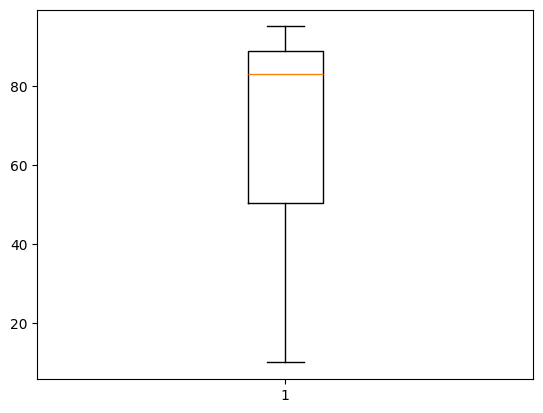

In [70]:
plt.boxplot(x=df['SPOS'])